In [1]:
import os
import random
import math
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
import cv2

from sklearn.metrics import roc_auc_score, mean_squared_error
from IPython.display import clear_output
from tqdm import tqdm
import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%cd /content/drive/MyDrive/petfinder

/content/drive/MyDrive/petfinder


In [5]:
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [6]:
train_csv

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


## Target variable

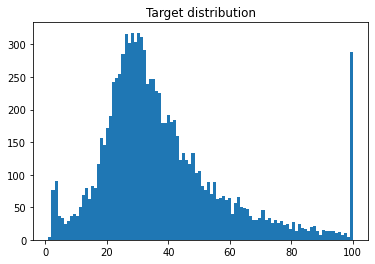

In [7]:
plt.hist(train_csv['Pawpularity'], bins=100)
plt.title('Target distribution')
plt.show()

There are 4 observations with Pawpularity=1


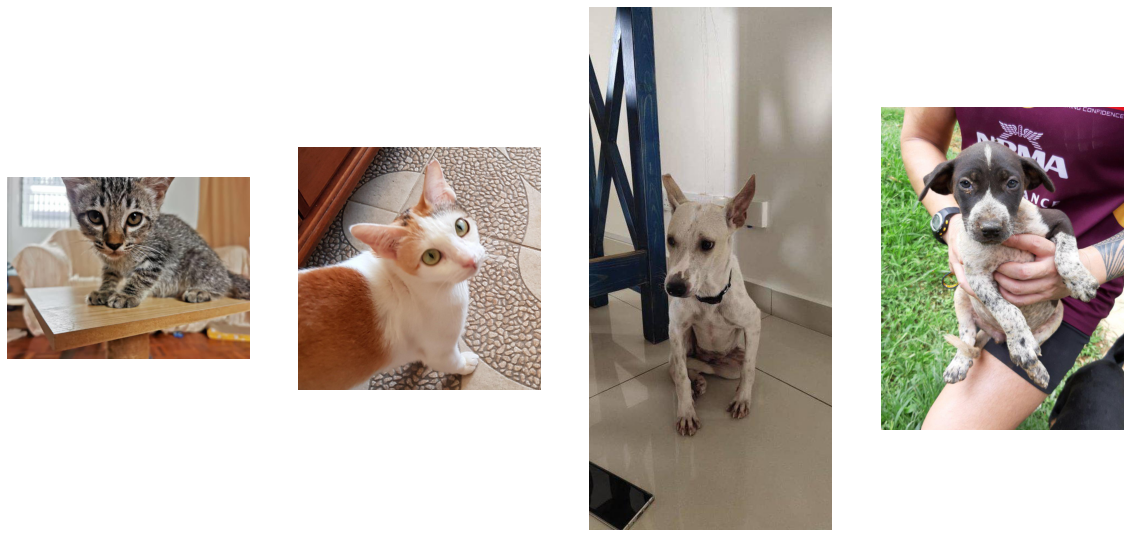

In [8]:
ids_1 = train_csv[train_csv['Pawpularity'] == 1]['Id']
print(f'There are {len(ids_1)} observations with Pawpularity=1')
n = min(5, len(ids_1))

fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(20, 20))
for i in range(n):
    image = Image.open(f'train/{ids_1.iloc[i]}.jpg').convert('RGB')
    axes[i].imshow(image)
    axes[i].axis('off')
plt.show()

There are 288 observations with Pawpularity=100


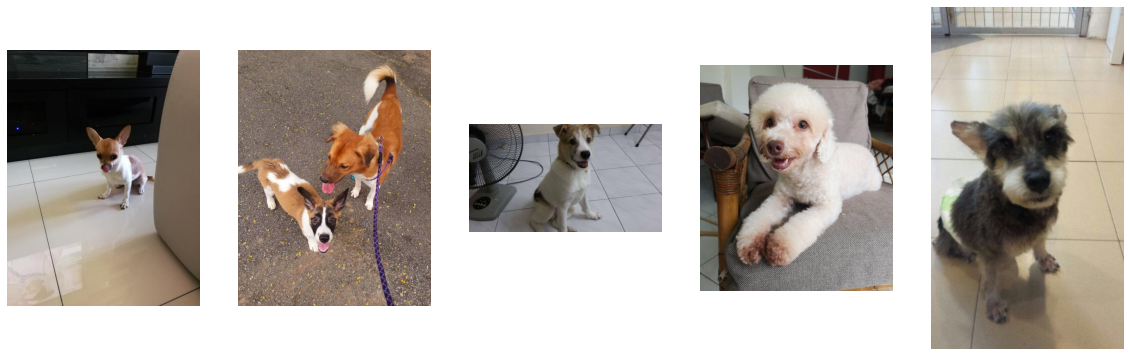

In [9]:
ids_100 = train_csv[train_csv['Pawpularity'] == 100]['Id']
print(f'There are {len(ids_100)} observations with Pawpularity=100')
n = min(5, len(ids_100))

fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(20, 20))
for i in range(n):
    image = Image.open(f'train/{ids_100.iloc[i]}.jpg').convert('RGB')
    axes[i].imshow(image)
    axes[i].axis('off')
plt.show()

In [10]:
train_csv['Pawpularity'].describe()

count    9912.000000
mean       38.039044
std        20.591990
min         1.000000
25%        25.000000
50%        33.000000
75%        46.000000
max       100.000000
Name: Pawpularity, dtype: float64

## Features

In [11]:
train_csv.describe()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
count,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000
mean,0.027643,0.772599,0.903955,0.861582,0.009988,0.067797,0.129338,0.049637,0.166263,0.172014,0.061239,0.070420,38.039044
std,0.163957,0.419175,0.294668,0.345356,0.099444,0.251409,0.335591,0.217204,0.372335,0.377411,0.239780,0.255866,20.591990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


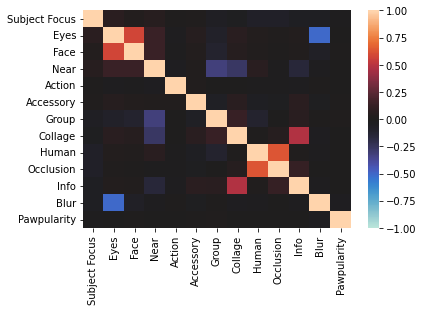

In [12]:
sns.heatmap(train_csv.corr(), vmin=-1, vmax=1, center=0);

## Train-test-split

In [13]:
data_to_train, data_to_test = train_test_split(train_csv, test_size=0.1, random_state=42)
print(f'Train len {data_to_train.shape[0]}')
print(f'Test len {data_to_test.shape[0]}')

Train len 8920
Test len 992


## Test data

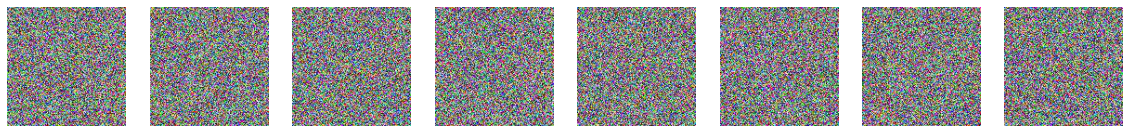

In [14]:
ids = test_csv['Id']
fig, axes = plt.subplots(nrows=1, ncols=len(ids), figsize=(20, 20))
for i in range(len(ids)):
    image = Image.open(f'test/{ids.iloc[i]}.jpg').convert('RGB')
    axes[i].imshow(image)
    axes[i].axis('off')
plt.show()